In [17]:
# Experiment/Eval - evaluate the quality of k-means clusters
# TODO - need to grab consolidated + labelled ds (tripadv + yelp) from postgres 

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os

In [13]:
os.getcwd()
files = os.listdir(os.curdir)
files

['TripAd_Restaurant.ipynb',
 'clustering_KNN.ipynb',
 'vacation_planner_data_processing.ipynb',
 'cleandata_csv.ipynb',
 '.ipynb_checkpoints',
 'Trip_Ad.ipynb',
 'TripAd_with_reviews.csv',
 'ThuyTesting.ipynb',
 'Yelp_NYC_data.csv',
 'airbnb_to_db.ipynb',
 'clean_yelp_csv.ipynb',
 'All_Attractions.csv',
 'Kmeans_silouette-score.ipynb',
 'NYC_Attractions_Raw.csv']

In [23]:
# hardcode local file for now, or use on in juypter nb 
df = pd.read_csv("TripAd_with_reviews.csv",low_memory=False)

# define params Kmeans model: lat+long dims
X = df[['latitude','longitude']]

latitude  longitude
0    40.711510 -74.013320
1    40.779430 -73.963240
2    40.781246 -73.966670
3    40.748400 -73.985700
4    40.759003 -73.979324
..         ...        ...
249  40.739920 -73.980080
250  40.738194 -73.989850
251  40.766440 -73.983330
252  40.760525 -73.985920
253  40.706670 -74.017690

[254 rows x 2 columns]

In [24]:
# instatiate k-means model (test using 3 clusters for now)
km_model = KMeans(n_clusters=3, random_state=42)
km_model.fit_predict(X)

array([2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [28]:
# calculate silhoutte score
sil_score = silhouette_score(X, km_model.labels_, metric='euclidean')
print('silhouetter score using n=3 clusters: %.3f' %sil_score)

silhouetter score using n=3 clusters: 0.540


In [40]:
# perform comparative analysis using sihouette plot
# code adapted from: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam 
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km_model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

ModuleNotFoundError: No module named 'yellowbrick'

For n_clusters = 2 The avg silhouette_score is : 0.995513972223094
For n_clusters = 3 The avg silhouette_score is : 0.5403912560673908
For n_clusters = 4 The avg silhouette_score is : 0.5798287880208803
For n_clusters = 5 The avg silhouette_score is : 0.5713720956213152
For n_clusters = 6 The avg silhouette_score is : 0.527573002481632
For n_clusters = 7 The avg silhouette_score is : 0.5356870747657769
For n_clusters = 8 The avg silhouette_score is : 0.48654626850235266


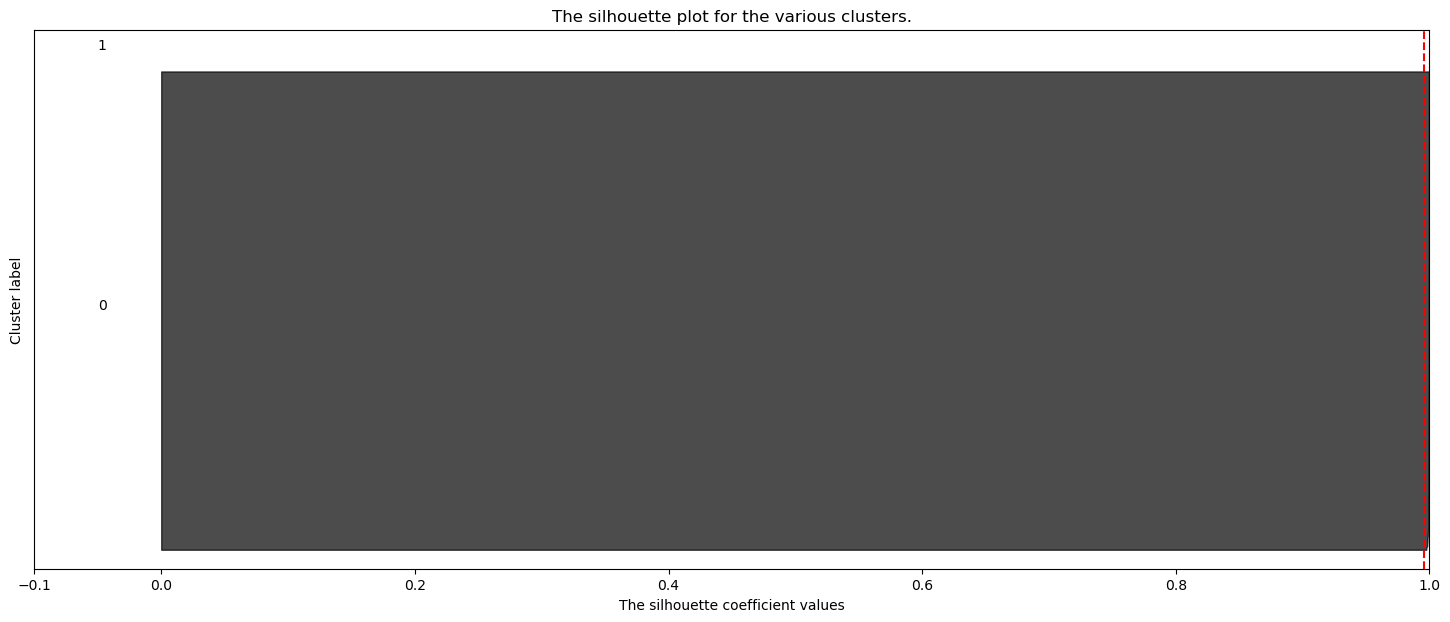

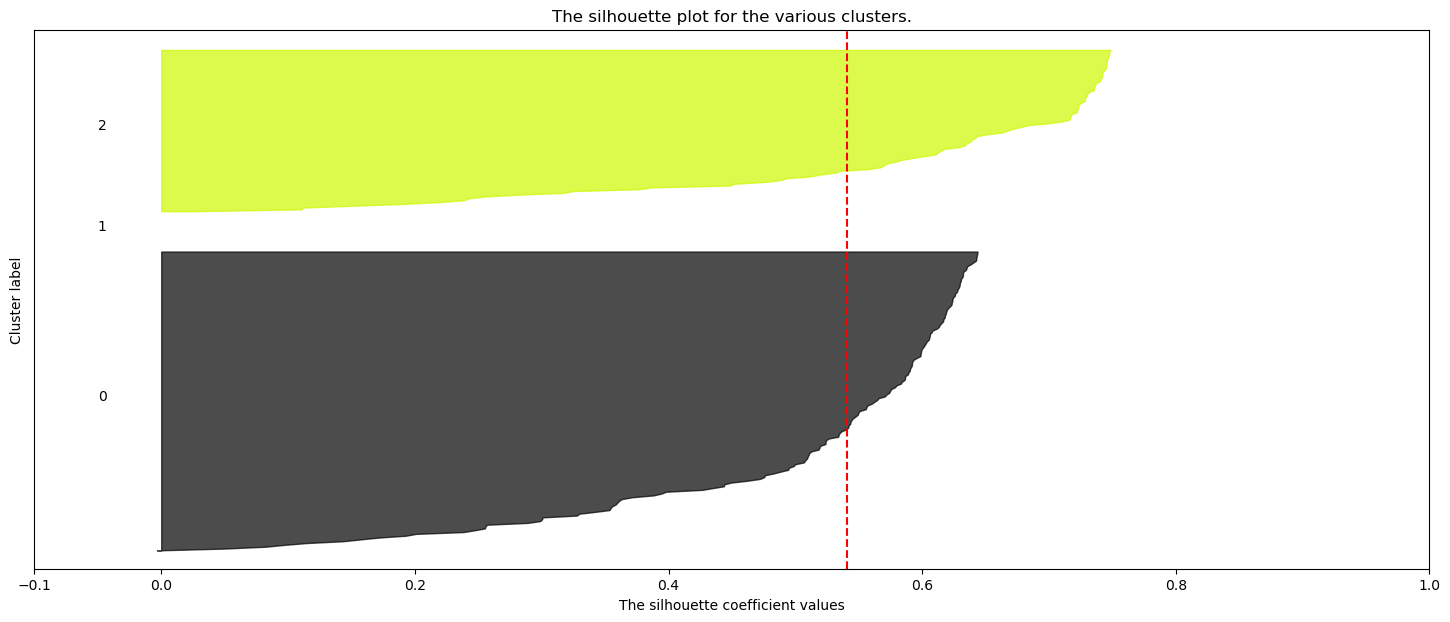

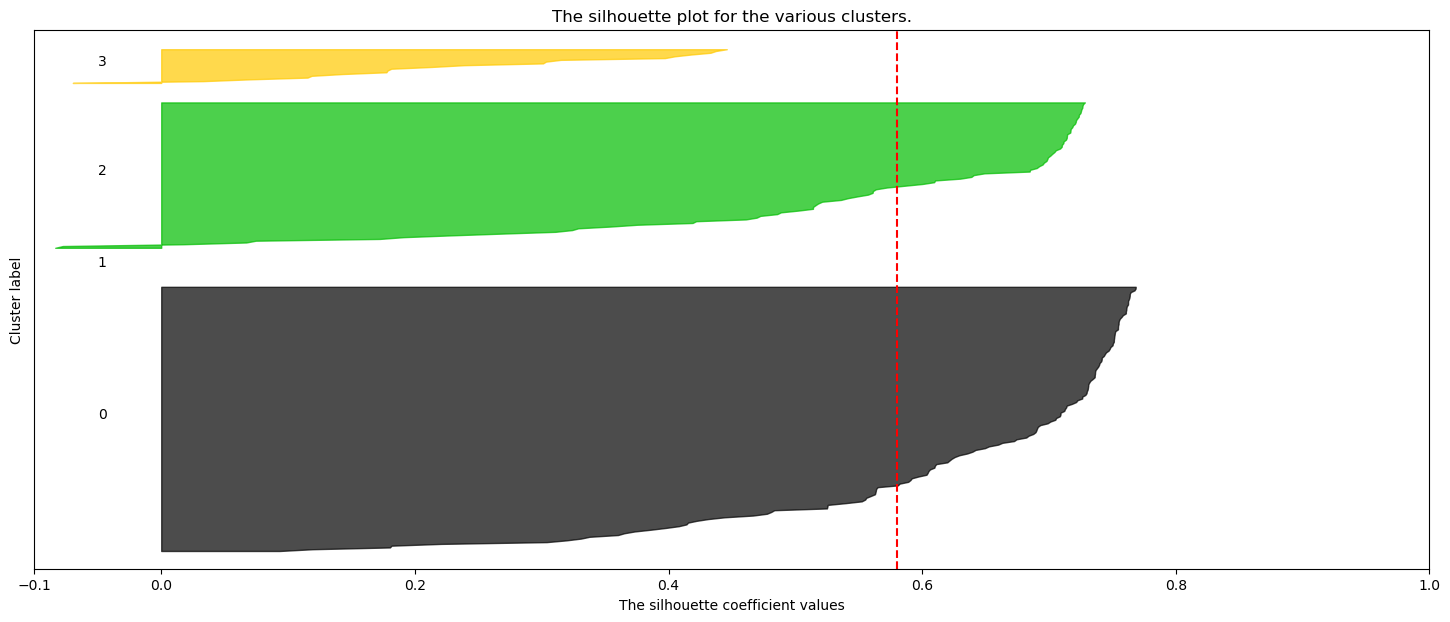

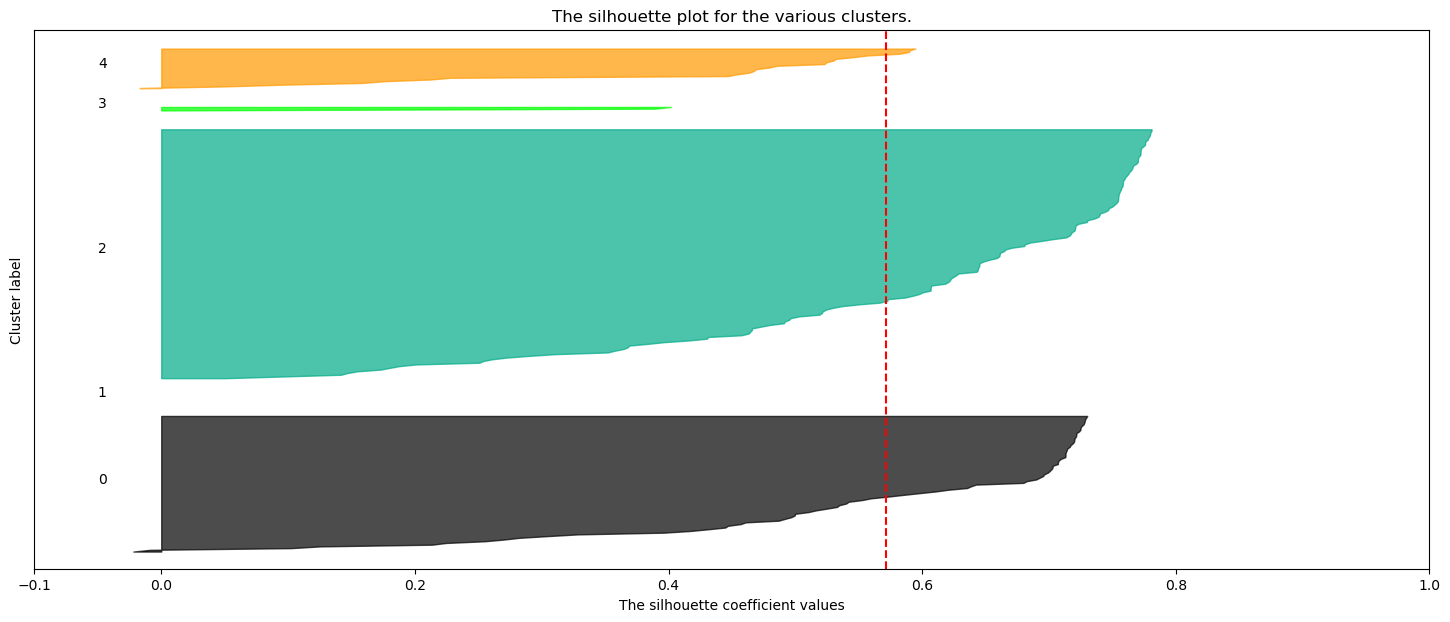

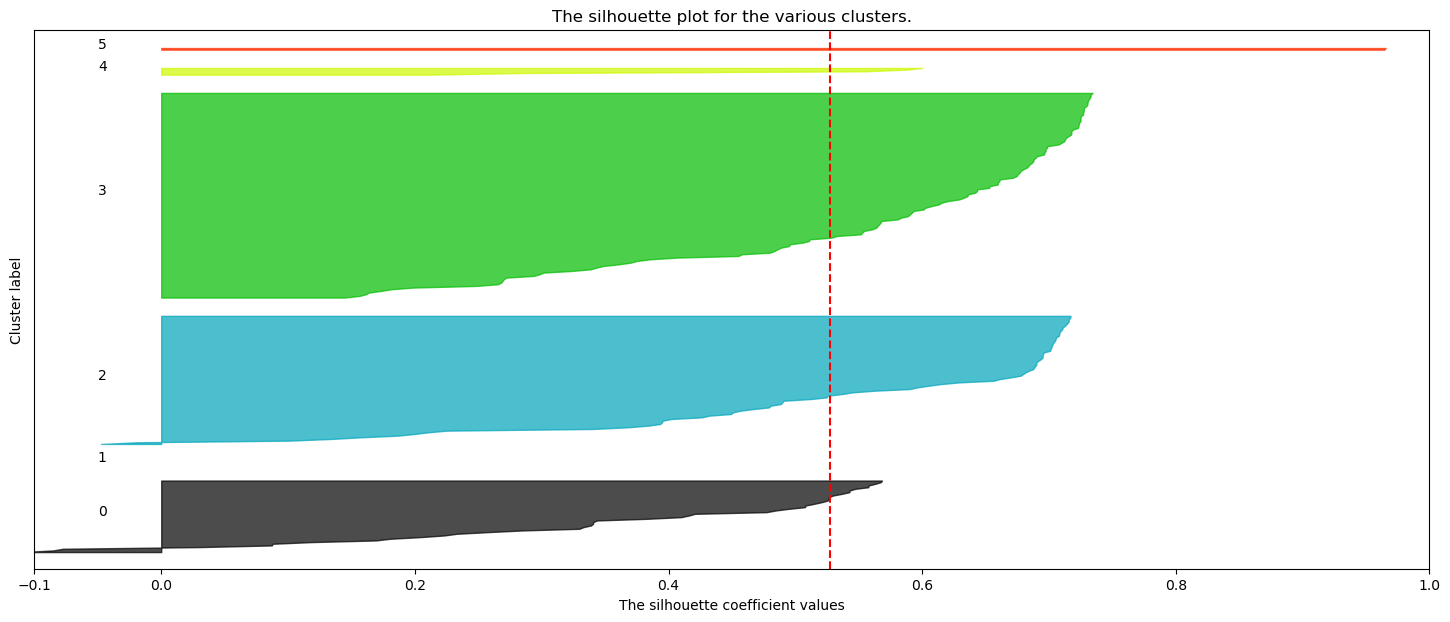

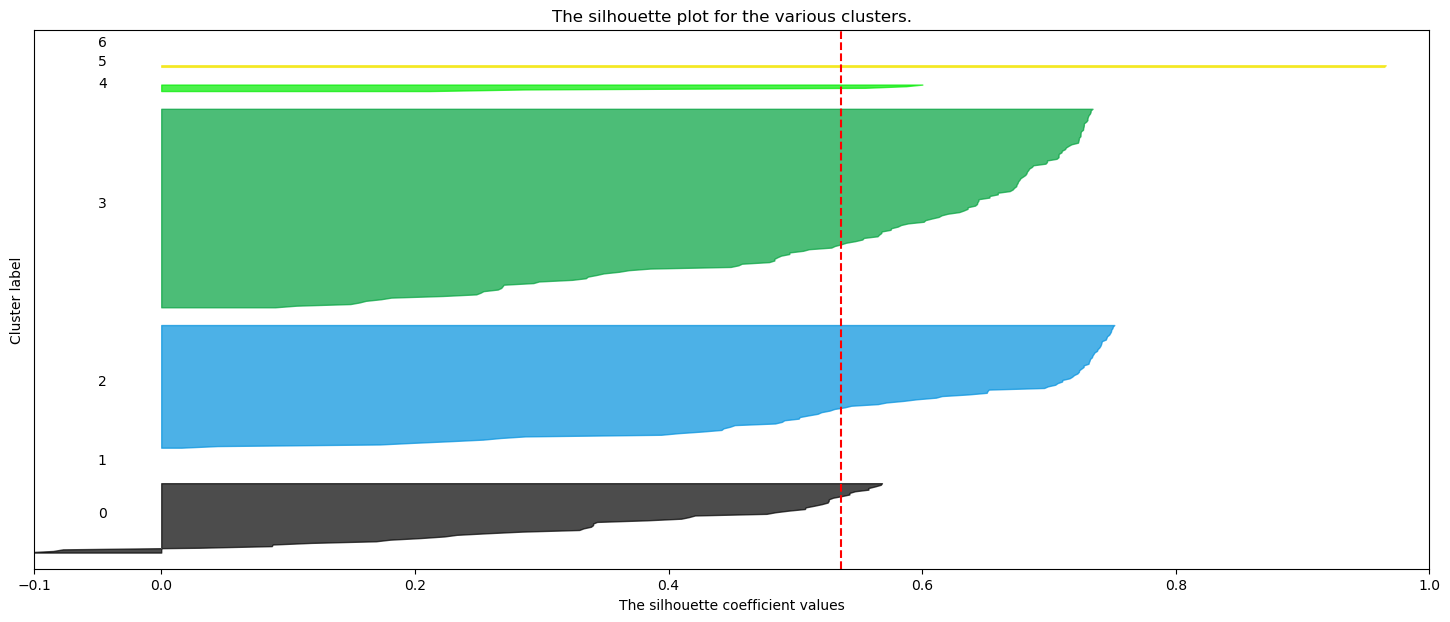

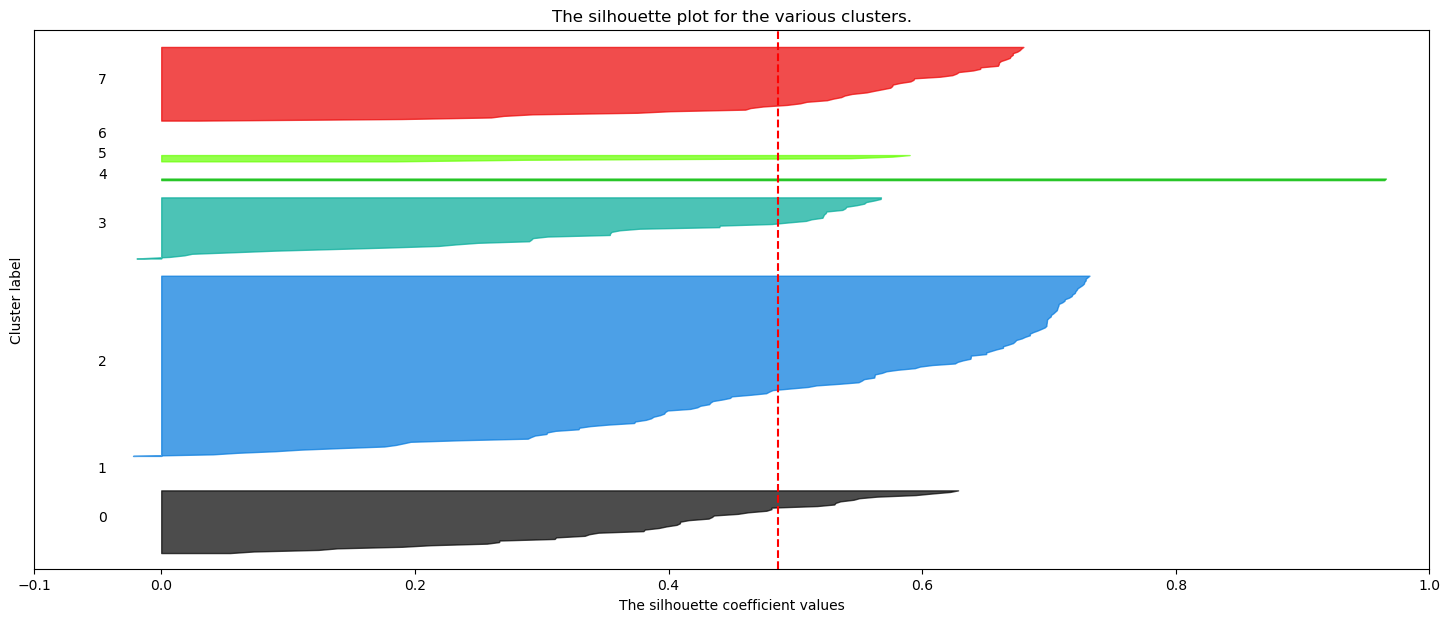

In [80]:
# 
k_list = list(range(2,9)) # define with at least 2 clusters min
for k in k_list:
    # create figures to display visualization
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The silhouette coefficient can range from [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # plots of individual clusters for distinguish easier
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    # seed of 42 for reproducibility.
    clusterer = KMeans(n_clusters=k, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # calculate the silhouette_score for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",k,
        "The avg silhouette_score is :",
        silhouette_avg,
    )
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

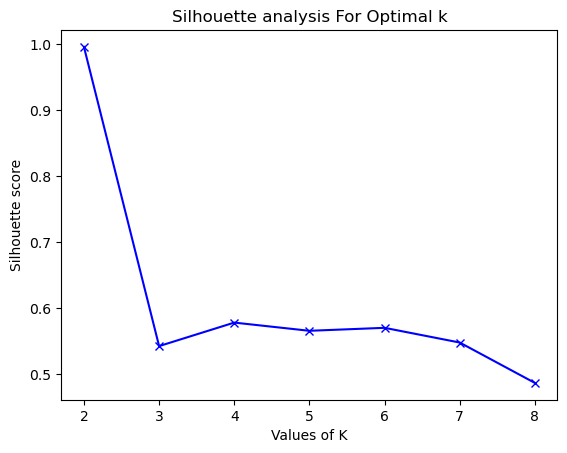

In [77]:
# code adapted from: https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

k_list = list(range(2,9)) # define with at least 2 clusters min
silhouette_avg = []
for k in k_list:
     # init kmeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X, cluster_labels))

# ;lot the silhouette scores
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

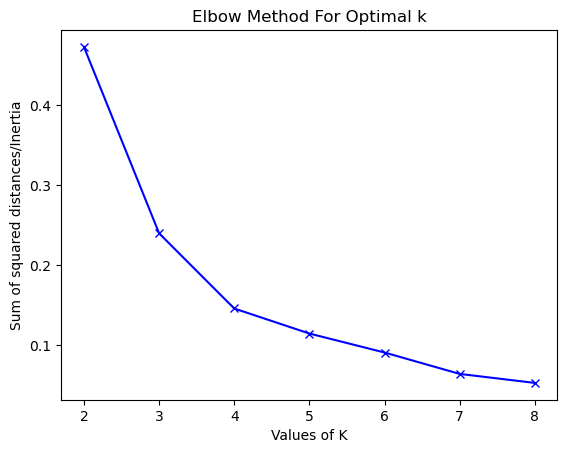

In [78]:
# check if this corresponds with the elbow plot
wcss = []
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(k_list,wcss,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# conclustion: 3 clusters should be chosen